In [1]:
import sksurv
import os
import pandas as pd

In [3]:
os.chdir('C:\\Users\\Kanika Saini\\Desktop\\New Folder (2)\\ProjectDataset')

In [35]:
dt=pd.read_excel('gene + clinical LUAD.xlsx')


In [36]:
dt=dt.set_index(dt.columns[0])

In [61]:
c=pd.read_excel('cox Luad.xlsx')

In [71]:
result=c.to_records(index=False)

In [70]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [80]:
print(c.columns)

Index(['Patient's Vital Status', 'Survival '], dtype='object')


In [73]:
len(result)

517

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(361, 261) (361,)
(156, 261) (156,)


In [47]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(dt, result)


iter     10: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [48]:
pd.Series(estimator.coef_, index=dt.columns)

ABCD2                                                             -0.233446
ABLIM1                                                             0.247545
ABRA                                                               0.471735
ACD                                                               -0.458201
ACOT13                                                            -0.396368
ACOT8                                                             -0.220161
ACSM5                                                              0.200671
ADAMDEC1                                                           0.443884
ADRA1D                                                             0.165225
AGBL4                                                             -0.017411
AKAP11                                                             0.076498
ALDH8A1                                                           -0.190942
ALKBH4                                                            -0.354049
ANGPTL1     

In [49]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Survival '], prediction)
result[0]

0.9581727987789116

Text(0.5, 0, 'time $t$')

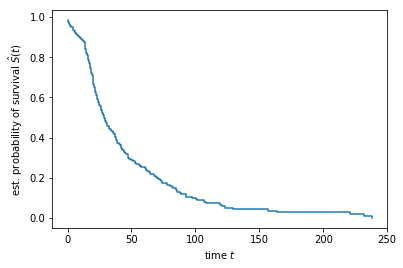

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Survival '])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [75]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)

iter     14: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [76]:
pd.Series(estimator.coef_, index=dt.columns)

ABCD2                                                              0.373366
ABLIM1                                                             0.645963
ABRA                                                               0.326688
ACD                                                               -0.940370
ACOT13                                                            -0.471590
ACOT8                                                             -0.578160
ACSM5                                                              0.382636
ADAMDEC1                                                          -0.249000
ADRA1D                                                             0.062566
AGBL4                                                              0.208828
AKAP11                                                            -0.042427
ALDH8A1                                                           -0.385830
ALKBH4                                                             0.044634
ANGPTL1     

In [85]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Survival '], prediction)
result[0]

0.8014960520847763

In [87]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV,KFold

In [88]:
cv=KFold(n_splits=10,shuffle=True,random_state=328)

In [128]:
coxnet=CoxnetSurvivalAnalysis(n_alphas=40,l1_ratio=0.5).fit(X_train,Y_train)

In [129]:
gcv=GridSearchCV(coxnet,{"alphas":[[v] for v in coxnet.alphas_]},cv=cv).fit(X_train,Y_train)

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  e

ArithmeticError: Numerical error, because weights are too large. Consider increasing alpha.